In [ ]:

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
#importing data
data_folder = './Tesco Grocery/'

Tesco_lsoa = pd.read_csv(data_folder + 'year_lsoa_grocery.csv')
lsoa_data = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet2',header=[0, 1, 2])

#column's name
'''for col in lsoa_data.columns: 
    print(col) '''
    
#create a DataFrame with indicators
indicators=pd.DataFrame({
    'area_id':lsoa_data[('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Codes')],
    'Unemployment Rate (%)':lsoa_data[('Economic Activity', 'Unemployment Rate', 2011)],
    'Fatal road casualties':lsoa_data[('Road Casualties', 2011, 'Fatal')],
    'Serious road casualties':lsoa_data[('Road Casualties', 2011, 'Serious')],
    'Slight road casualties':lsoa_data[('Road Casualties', 2011, 'Slight')],
    'Mean Annual Household Income estimate (£)':lsoa_data[('Household Income, 2011/12', 'Mean Annual Household Income estimate (£)', 'Unnamed: 72_level_2')],
    'Median Annual Household Income estimate (£)':lsoa_data[('Household Income, 2011/12', 'Median Annual Household Income estimate (£)', 'Unnamed: 73_level_2')],
    'No Qualification(%)':lsoa_data[('Qualifications', '% No qualifications', 2011)],
    'High Qualification(%)':lsoa_data[('Qualifications', '% Highest level of qualification: Level 4 qualifications and above', 2011)]
})

indicators.head()

In [ ]:
#merging datas
df = pd.merge(indicators,Tesco_lsoa,on='area_id')
df.head()

In [ ]:
#Keep datas with representativness >0.1 
df_representativ = df.loc[(df['representativeness_norm'] > 0.1)]
non_representativ_areas=df.shape[0]-df_representativ.shape[0]
print(non_representativ_areas,'areas are not representative and expulsed of our study')

In [ ]:
#computing spearman correlation for each indicator
id_indicators=['Unemployment Rate (%)','Fatal road casualties','Serious road casualties','Slight road casualties','Mean Annual Household Income estimate (£)','Median Annual Household Income estimate (£)','No Qualification(%)','High Qualification(%)']
R=[]
P=[]
for i in id_indicators:
    r= stats.spearmanr(df_representativ['volume'],df_representativ[i],nan_policy='omit')[0]
    p= stats.spearmanr(df_representativ['volume'],df_representativ[i],nan_policy='omit')[1]
    R.append(r)
    P.append(p)

In [6]:
#Create a data frame with the results
results = pd.DataFrame({
    'Indicators':id_indicators,
    'R': R,
    'p-value':P
   
    })
results


,Indicators,R,p-value
0,Unemployment Rate (%),0.435764,2.566883e-179
1,Fatal road casualties,-0.025896,1.070550e-01
2,Serious road casualties,-0.054971,6.193980e-04
3,Slight road casualties,-0.035158,2.865264e-02
4,Mean Annual Household Income estimate (£),-0.512252,3.140066e-258
5,Median Annual Household Income estimate (£),-0.490247,1.968424e-233
6,No Qualification(%),0.487596,1.445833e-230
7,High Qualification(%),-0.498968,4.820703e-243


In [7]:
non_significativ=results.loc[(results['p-value'] > 0.05)]
print(non_significativ.Indicators,'is not significative because its p-value is >0.05')

1    Fatal road casualties
Name: Indicators, dtype: object is not significative because its p-value is >0.05


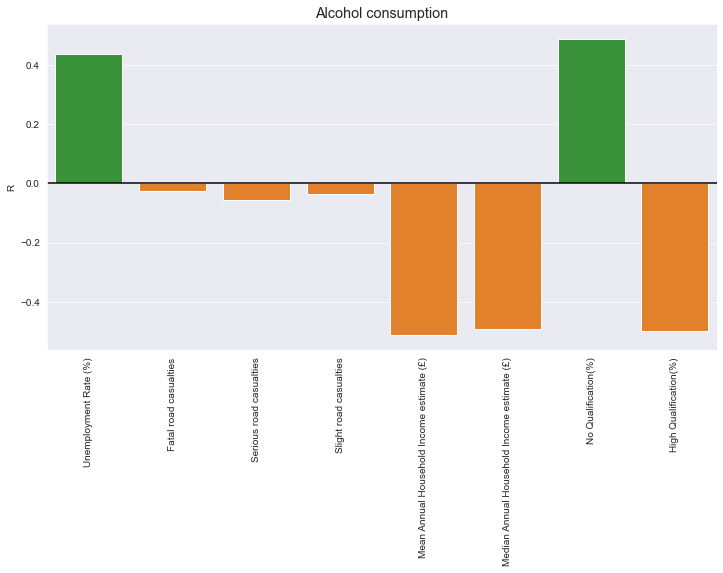

In [8]:
plt.figure(figsize=(12,6))

#Background of the figure 
sns.set_style('darkgrid')

#Green color for positive correlation and orange one for negative correlation
green = sns.color_palette()[2]
orange = sns.color_palette()[1]
color = [green if R>0 else orange for R in results.R]


plot = sns.barplot(data=results, x="Indicators",y="R",palette=color)
plot.set_title('Alcohol consumption',size='x-large')
plot.axhline(y=0, linestyle='-',linewidth=1.5, color='black')
plot.set_xlabel('')
plot.set_xticklabels(results.Indicators,rotation=90)
plt.show()